In [32]:
sample_data

[1] -0.1  0.7 -0.3  2.1  0.8 -0.3  1.0  1.2  1.1  0.2

In [35]:
sample_data

[1] -0.1  0.7 -0.3  2.1  0.8 -0.3  1.0  1.2  1.1  0.2

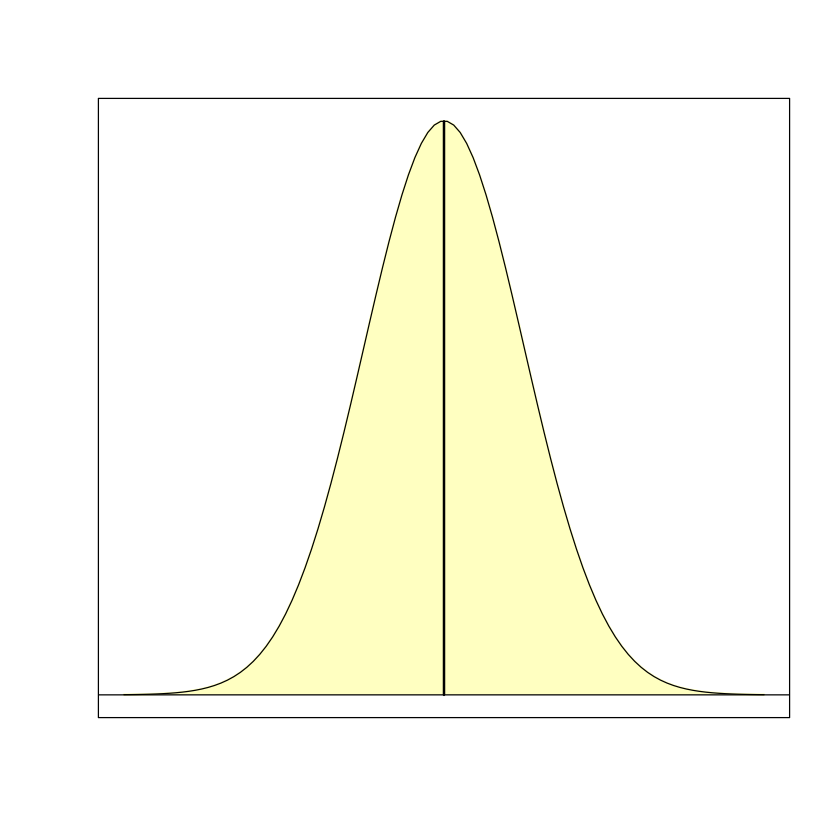

In [50]:
plot(x, y, type="l", lwd=2, col="#FFFFCC", xaxt='n', yaxt='n', xlab="", ylab="")  # 분포곡선 그리기
polygon(c(x, rev(x)), c(y, rep(0, length(y))), col="#FFFFCC", border=NA)  # 면적 칠하기
lines(x, y, col="black", lwd=1) # 분포곡선 테두리 그리기
segments(0, 0, 0, max(y), col="black", lwd=2) # x=0에 해당하는 지점에 수평선 그리기
abline(h=0, lty=1, col="black") 
set.seed(1)  # 난수 발생 초기치 설정
sample_data <- round(rnorm(10, mean=0.5, sd=1), 2)  # N(0.5, 1)에서 10개 추출하여 소숫점 둘째 자리에서 반올림
sample_data = round(sample_data,1)
stripchart(sample_data, method="jitter", add=TRUE, pch=20, col="red")


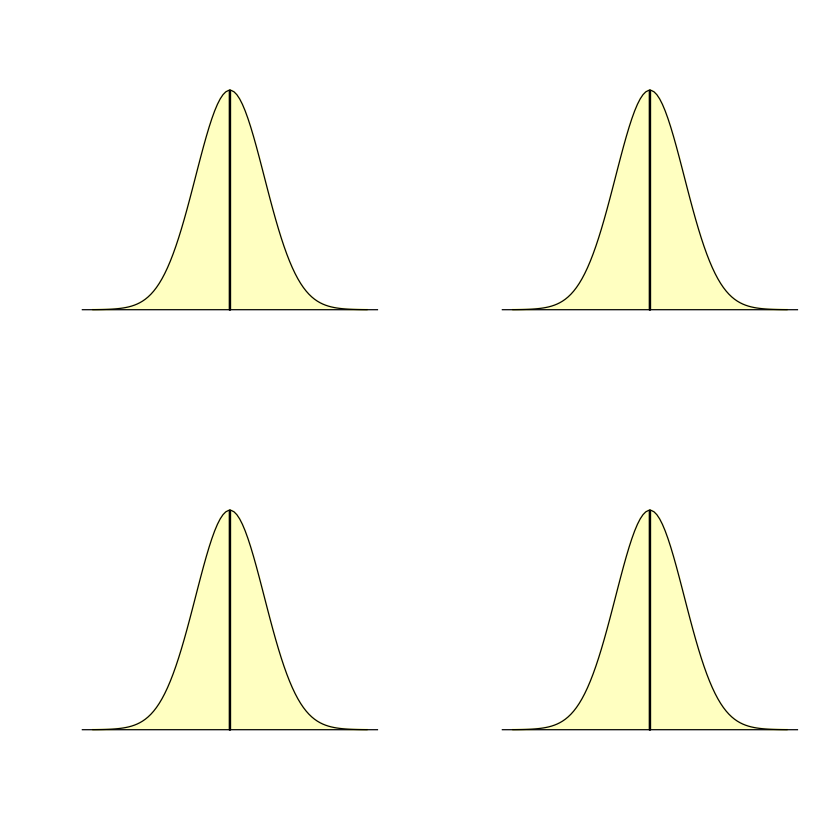

In [49]:
par(bg = "white", col.axis = "white", col.lab = "white", col.main = "white", 
    col.sub = "white", xaxt = "n", yaxt = "n", bty = "n")
par(mfrow=c(2,2))

plot(x, y, type="l", lwd=2, col="#FFFFCC", xaxt='n', yaxt='n', xlab="", ylab="")  # 분포곡선 그리기
polygon(c(x, rev(x)), c(y, rep(0, length(y))), col="#FFFFCC", border=NA)  # 면적 칠하기
lines(x, y, col="black", lwd=1) # 분포곡선 테두리 그리기
segments(0, 0, 0, max(y), col="black", lwd=2) # x=0에 해당하는 지점에 수평선 그리기
abline(h=0, lty=1, col="black") 
set.seed(1)  # 난수 발생 초기치 설정
sample_data <- round(rnorm(10, mean=0.5, sd=1), 2)  # N(0.5, 1)에서 10개 추출하여 소숫점 둘째 자리에서 반올림
sample_data = round(sample_data,1)
stripchart(sample_data, method="jitter", add=TRUE, pch=20, col="red")

           

plot(x, y, type="l", lwd=2, col="#FFFFCC", xaxt='n', yaxt='n', xlab="", ylab="")  # 분포곡선 그리기
polygon(c(x, rev(x)), c(y, rep(0, length(y))), col="#FFFFCC", border=NA)  # 면적 칠하기
lines(x, y, col="black", lwd=1) # 분포곡선 테두리 그리기
segments(0, 0, 0, max(y), col="black", lwd=2) # x=0에 해당하는 지점에 수평선 그리기
abline(h=0, lty=1, col="black") 


plot(x, y, type="l", lwd=2, col="#FFFFCC", xaxt='n', yaxt='n', xlab="", ylab="")  # 분포곡선 그리기
polygon(c(x, rev(x)), c(y, rep(0, length(y))), col="#FFFFCC", border=NA)  # 면적 칠하기
lines(x, y, col="black", lwd=1) # 분포곡선 테두리 그리기
segments(0, 0, 0, max(y), col="black", lwd=2) # x=0에 해당하는 지점에 수평선 그리기
abline(h=0, lty=1, col="black") 

plot(x, y, type="l", lwd=2, col="#FFFFCC", xaxt='n', yaxt='n', xlab="", ylab="")  # 분포곡선 그리기
polygon(c(x, rev(x)), c(y, rep(0, length(y))), col="#FFFFCC", border=NA)  # 면적 칠하기
lines(x, y, col="black", lwd=1) # 분포곡선 테두리 그리기
segments(0, 0, 0, max(y), col="black", lwd=2) # x=0에 해당하는 지점에 수평선 그리기
abline(h=0, lty=1, col="black") 